### Student Performance Analysis and Visualizations

<img src="https://i2-prod.mirror.co.uk/incoming/article4479481.ece/ALTERNATES/s615/A-level-students-sit-an-A-level-maths-exam-inside-a-sports-hall.jpg" width="800px">

In [1]:
# for some basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for providing path
import os
print(os.listdir('../input/'))

['StudentsPerformance.csv']


**Reading the Data set**

In [2]:
# reading the data
data = pd.read_csv('../input/StudentsPerformance.csv')

# getting the shape of the data
print(data.shape)


(1000, 8)


In [3]:
# looking at the head of the data

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# describing the dataset

data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
# checking if the dataset contains any null values

data.isnull().sum().sum()

0

##  Data Visualizations

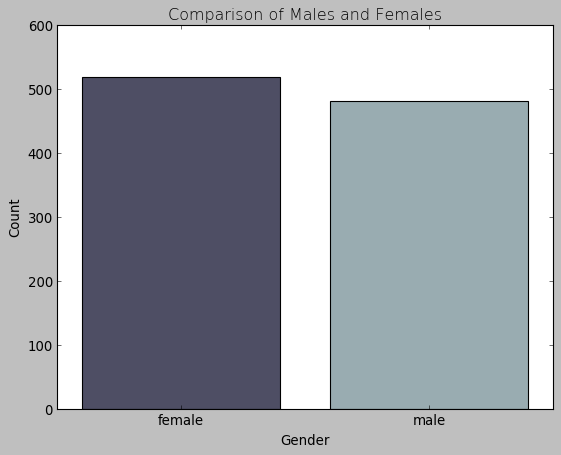

In [6]:
# visualising the number of male and female in the dataset

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('_classic_test')
sns.countplot(data['gender'], palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

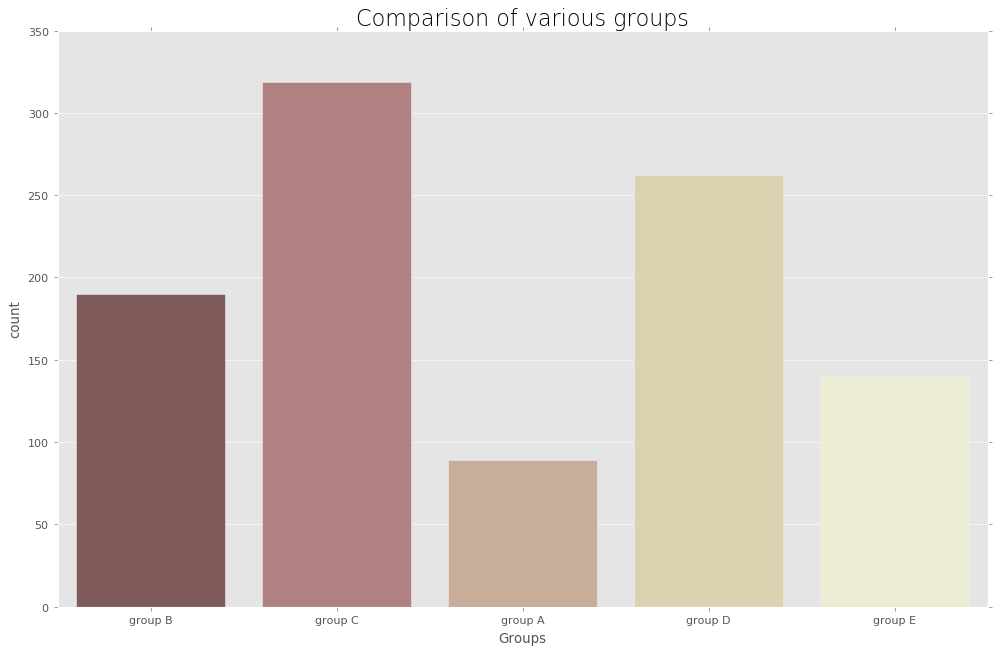

In [7]:
# visualizing the different groups in the dataset

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

sns.countplot(data['race/ethnicity'], palette = 'pink')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

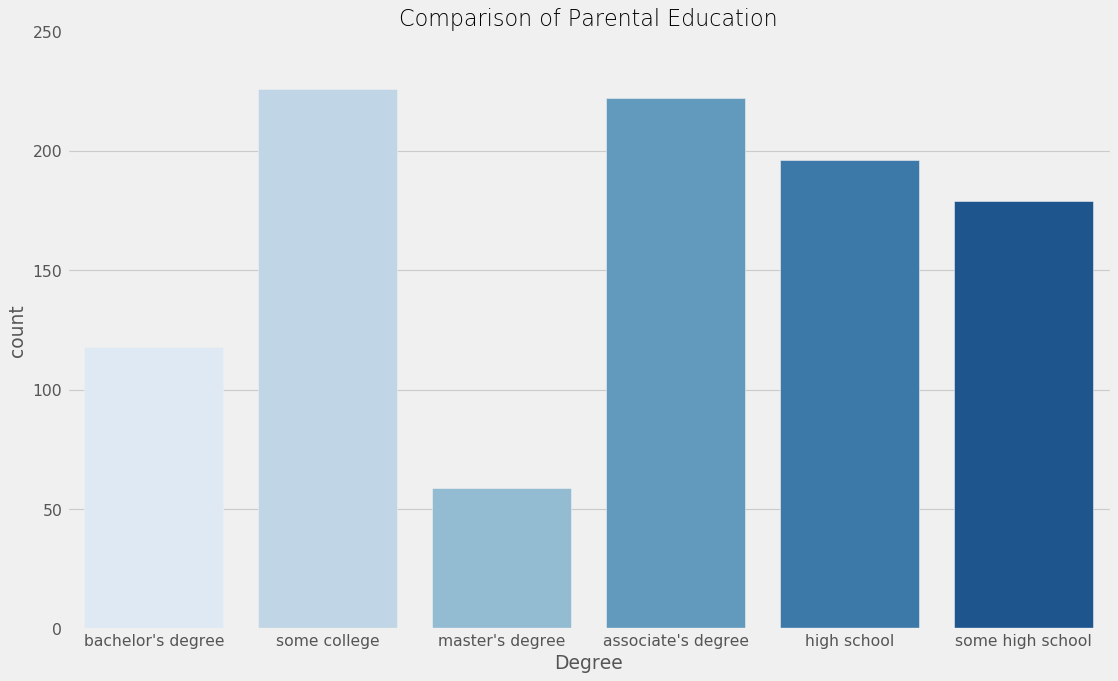

In [8]:
# visualizing the differnt parental education levels

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

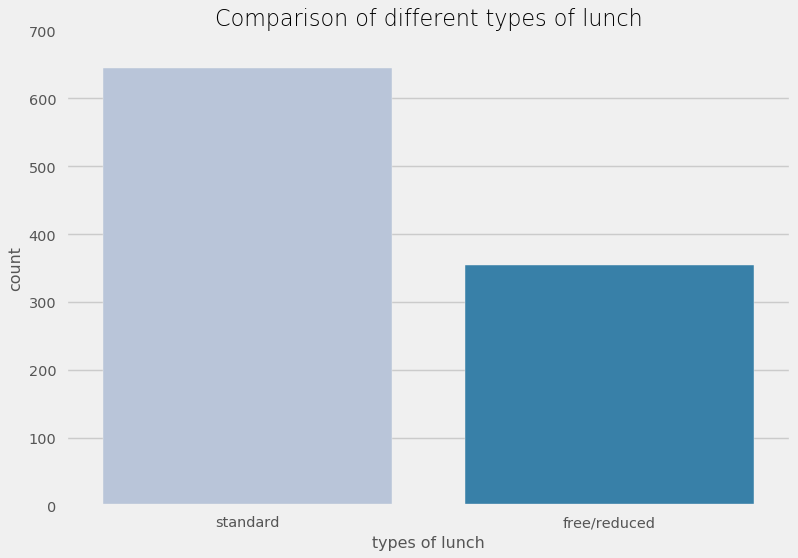

In [9]:
# visualizing different types of lunch 

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')

sns.countplot(data['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

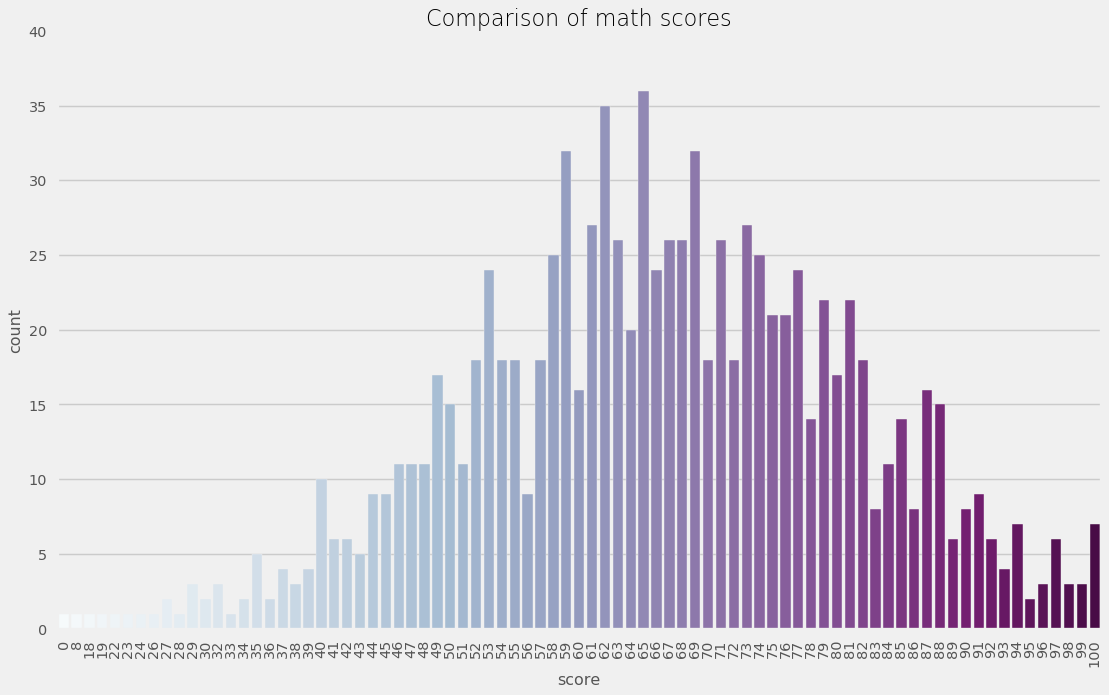

In [10]:
# visualizing maths score

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['math score'], palette = 'BuPu')
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

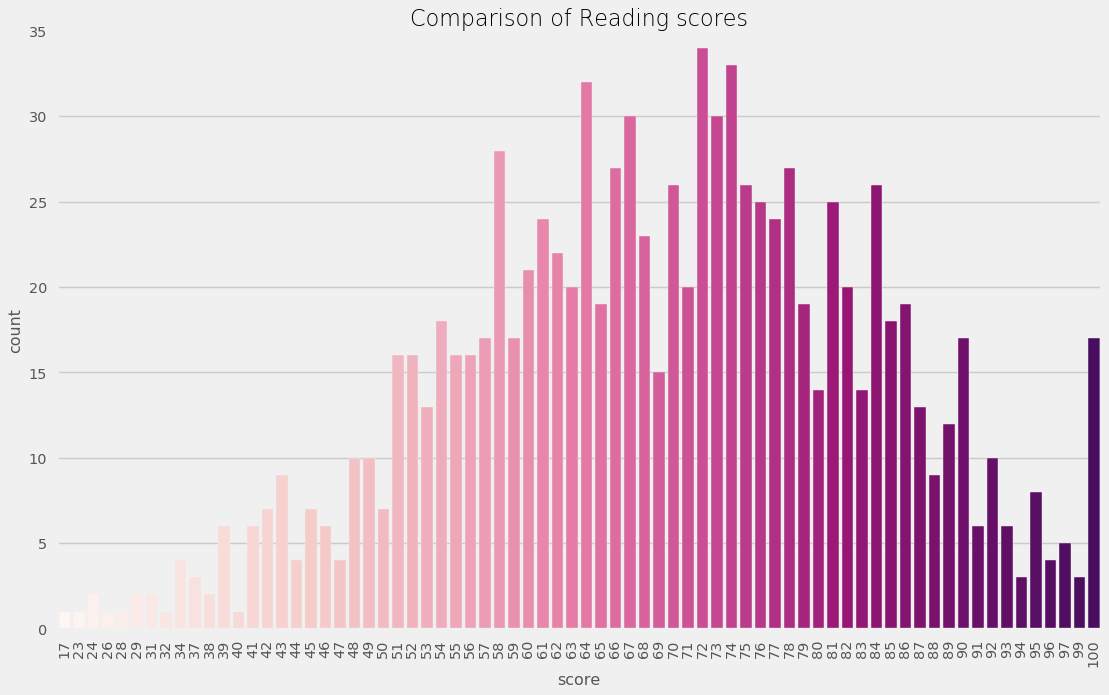

In [11]:
## visualizing reading score

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['reading score'], palette = 'RdPu')
plt.title('Comparison of Reading scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

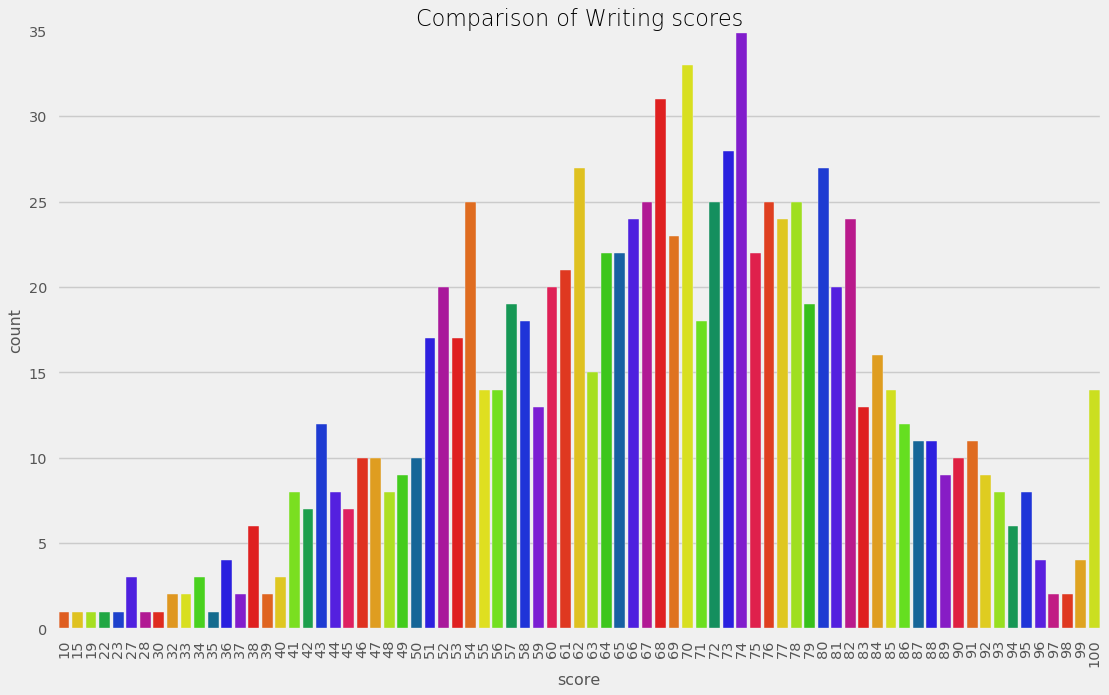

In [12]:
# visualizing writing score

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['writing score'], palette = 'prism')
plt.title('Comparison of Writing scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

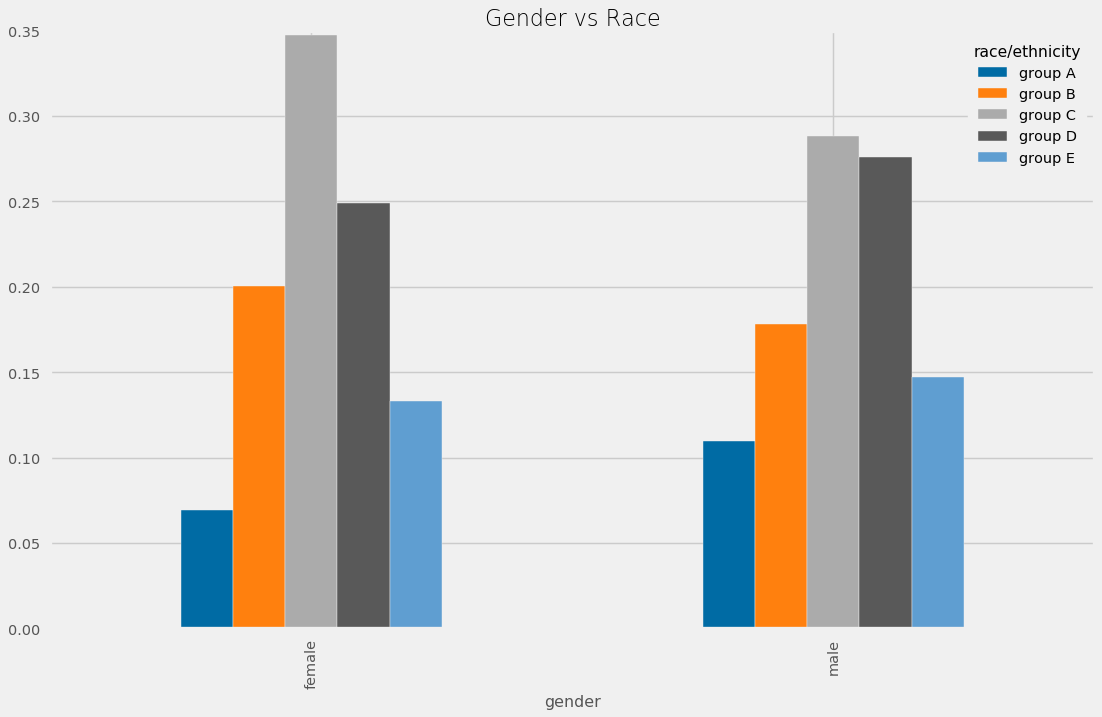

In [13]:
# gender vs race/etnicity 

plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(data['gender'], data['race/ethnicity'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Gender vs Race', fontweight = 30, fontsize = 20)
plt.show()

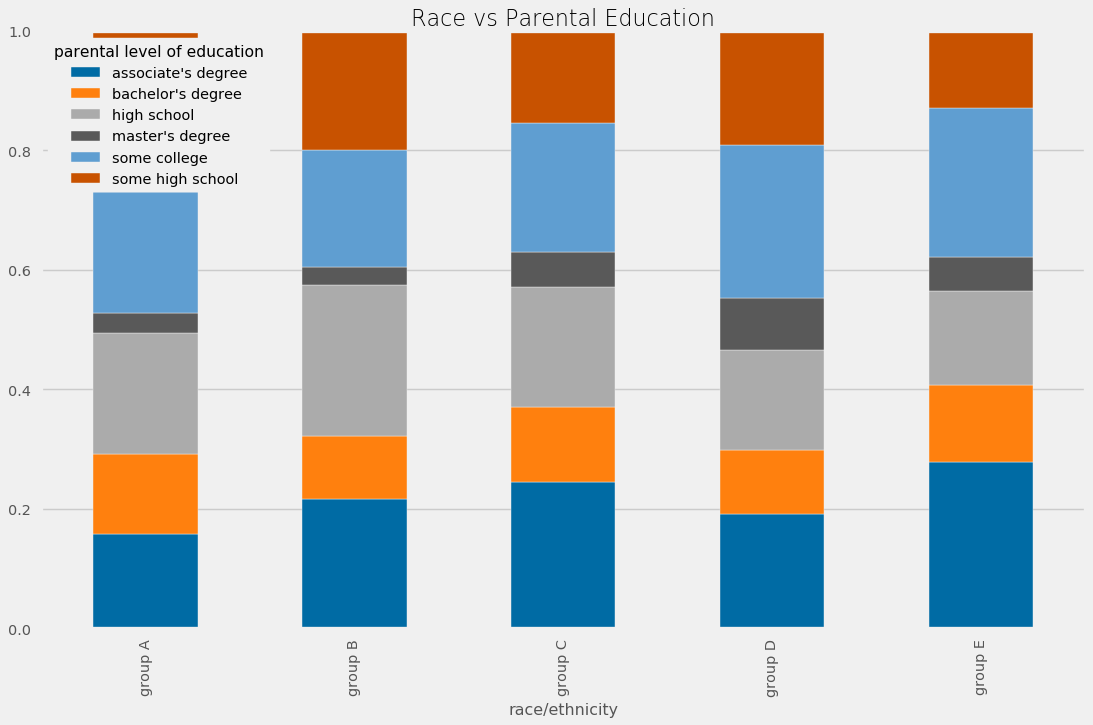

In [14]:
# comparison of race/ethnicity and parental level of education

plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(data['race/ethnicity'], data['parental level of education'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = 'True')
plt.title('Race vs Parental Education', fontweight = 30, fontsize = 20)
plt.show()

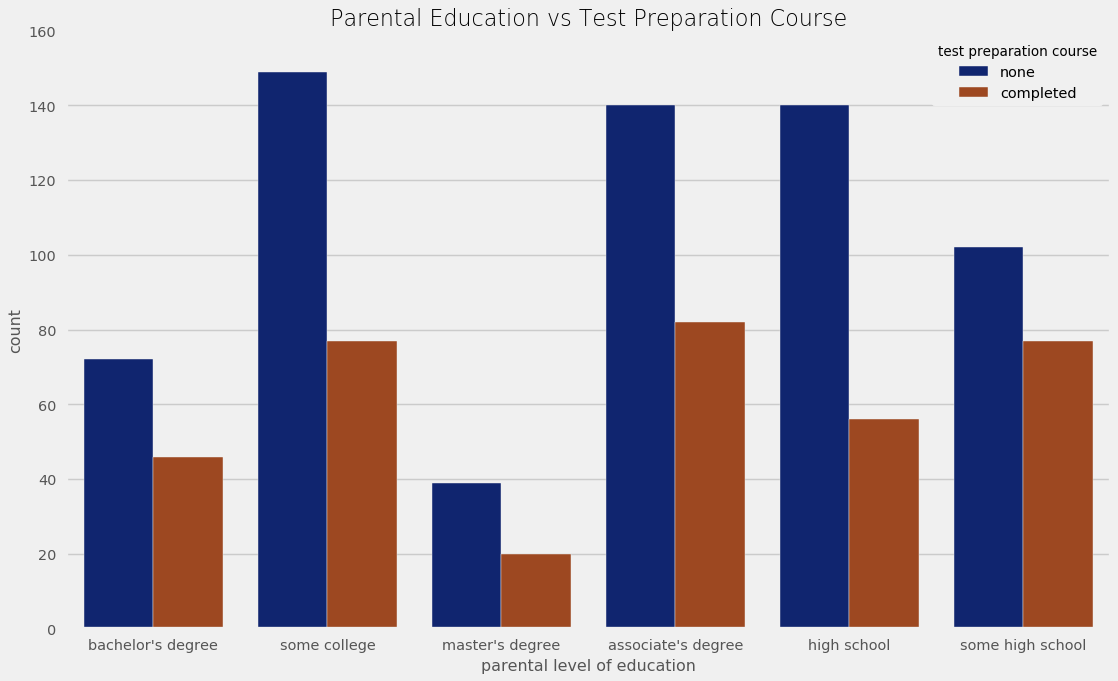

In [15]:
# comparison of parental degree and test course

plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(x = 'parental level of education', data = data, hue = 'test preparation course', palette = 'dark')
plt.title('Parental Education vs Test Preparation Course', fontweight = 30, fontsize = 20)
plt.show()

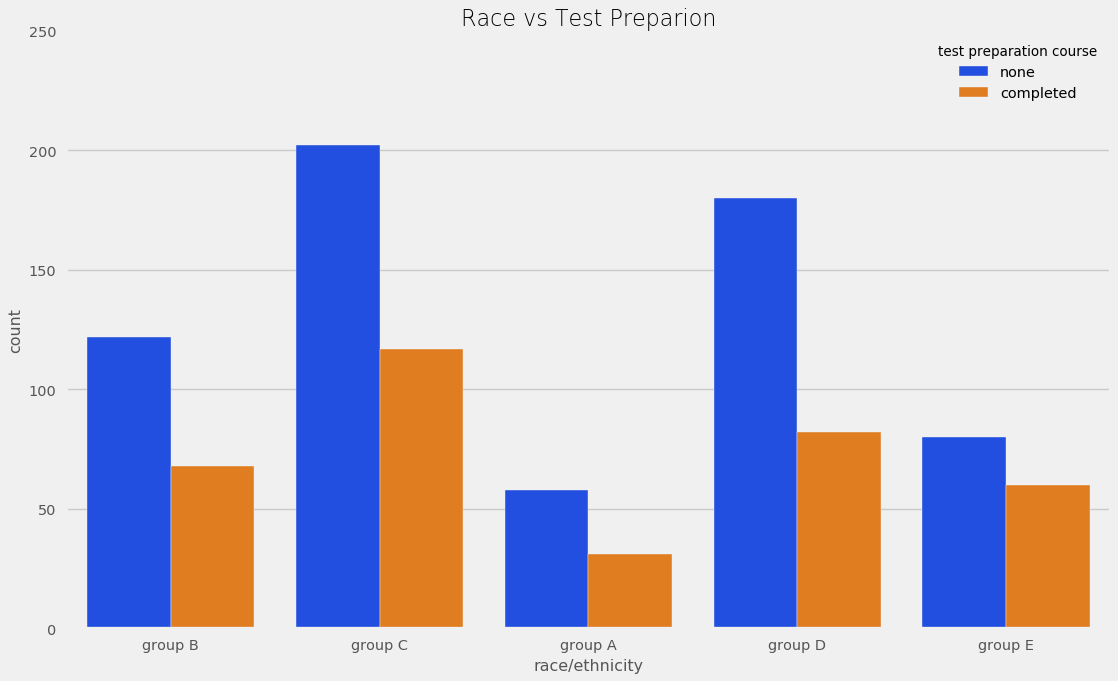

In [16]:
# comparison of race/ethnicity and test preparation course

sns.countplot(x = 'race/ethnicity', data = data,  hue = 'test preparation course', palette = 'bright')
plt.title('Race vs Test Preparion', fontweight = 30, fontsize = 20)
plt.show()

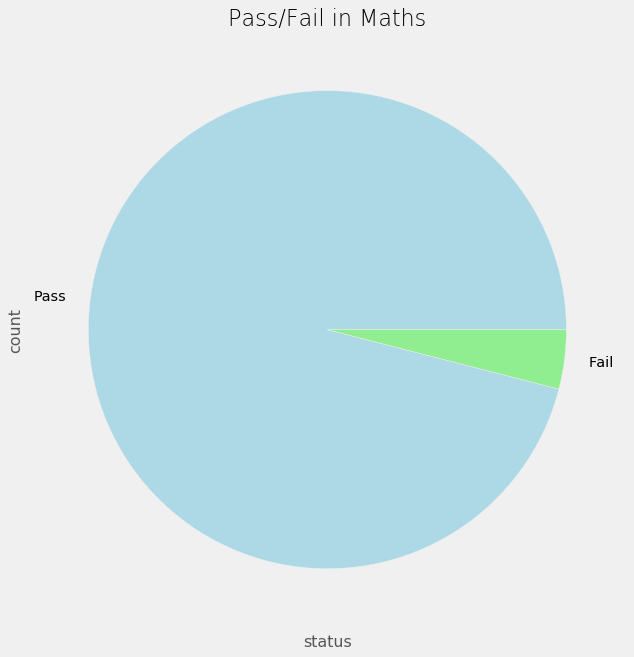

In [17]:
# feature engineering on the data to visualize and solve the dataset more accurately

# setting a passing mark for the students to pass on the three subjects individually
passmarks = 40

# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_math'] = np.where(data['math score']< passmarks, 'Fail', 'Pass')
data['pass_math'].value_counts().plot.pie(colors = ['lightblue', 'lightgreen'])

plt.title('Pass/Fail in Maths', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

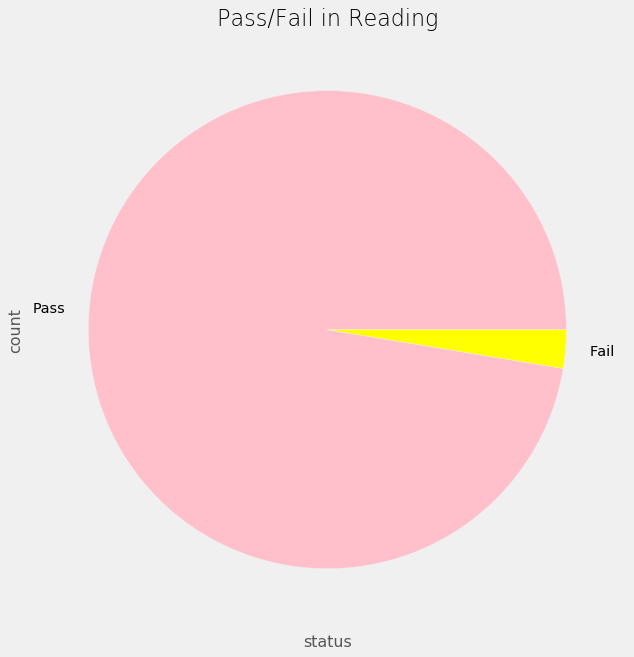

In [18]:
# creating a new column pass_reading, this column will tell us whether the students are pass or fail

data['pass_reading'] = np.where(data['reading score']< passmarks, 'Fail', 'Pass')
data['pass_reading'].value_counts(dropna = False).plot.pie(colors = ['pink', 'yellow'])

plt.title('Pass/Fail in Reading', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

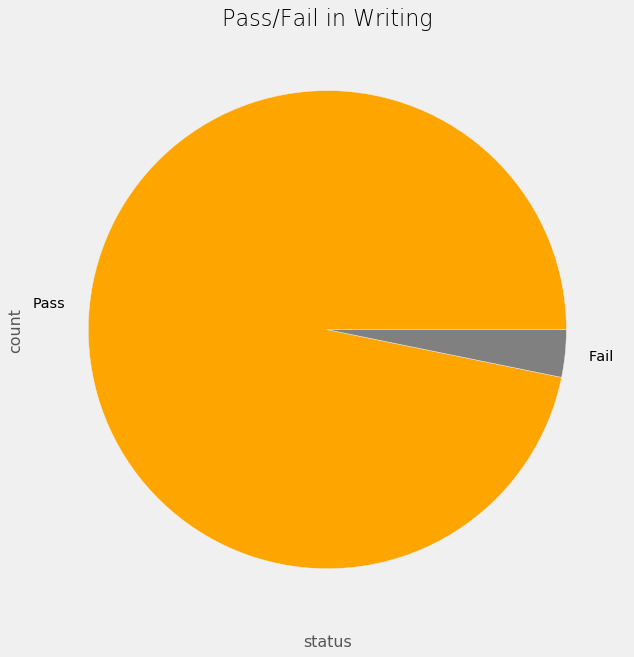

In [19]:
# creating a new column pass_writing, this column will tell us whether the students are pass or fail

data['pass_writing'] = np.where(data['writing score']< passmarks, 'Fail', 'Pass')
data['pass_writing'].value_counts(dropna = False).plot.pie(colors = ['orange', 'gray'])

plt.title('Pass/Fail in Writing', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

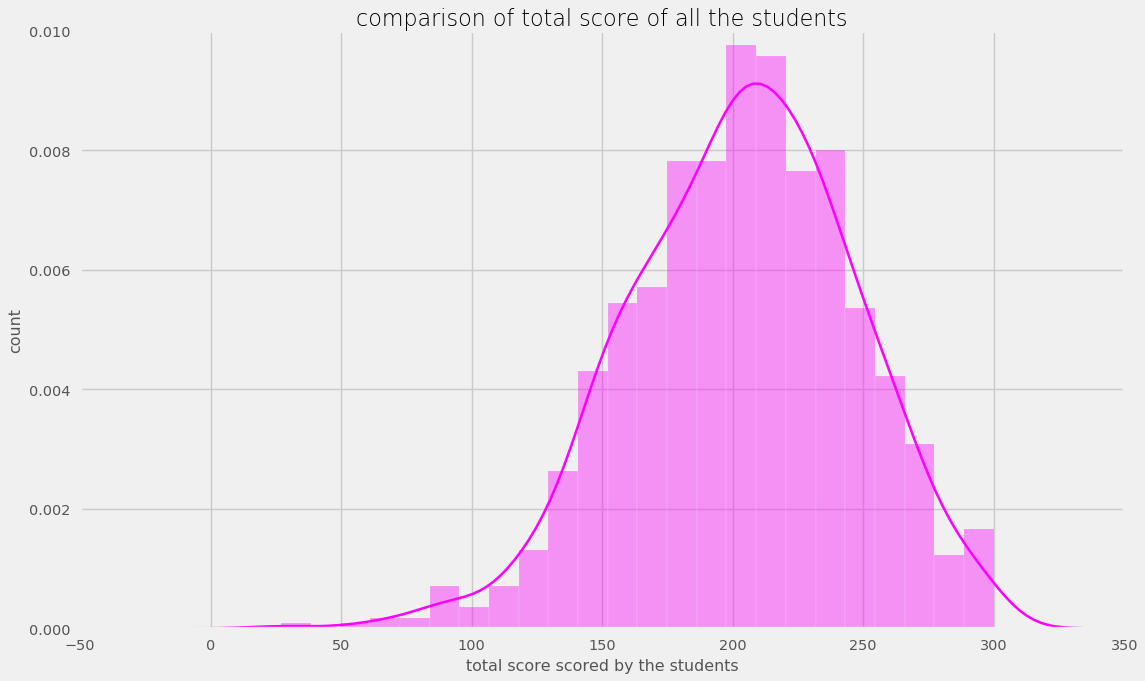

In [20]:
# computing the total score for each student

import warnings
warnings.filterwarnings('ignore')

data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

sns.distplot(data['total_score'], color = 'magenta')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

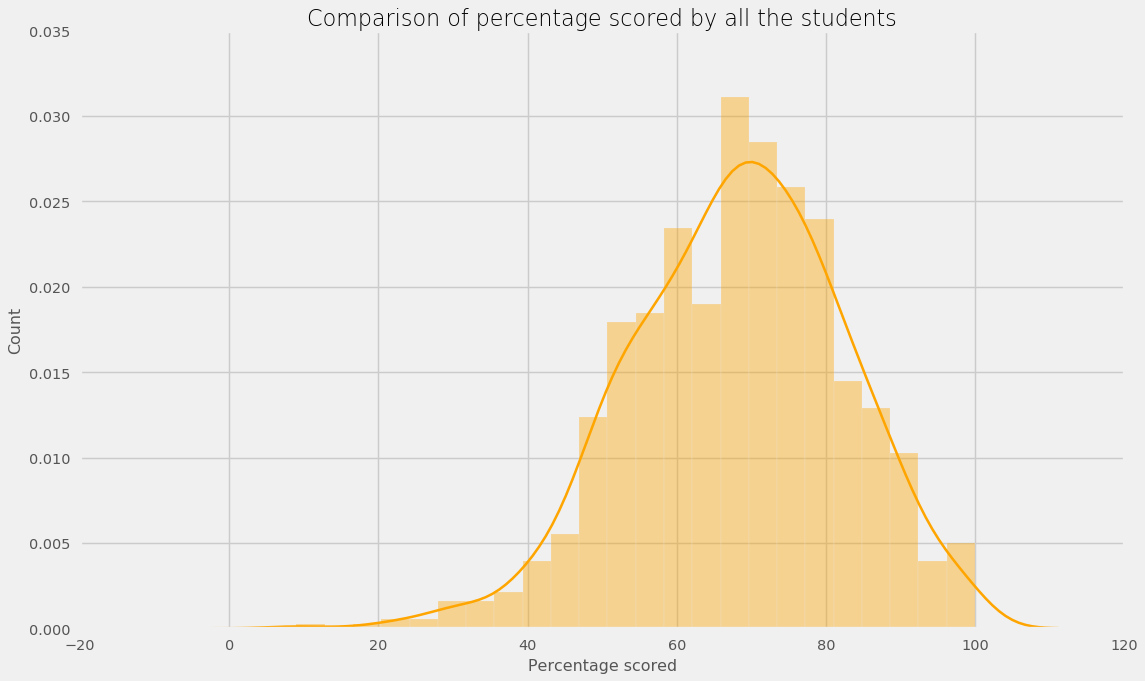

In [21]:

# computing percentage for each of the students
# importing math library to use ceil
from math import * 
import warnings
warnings.filterwarnings('ignore')

data['percentage'] = data['total_score']/3

for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(data['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

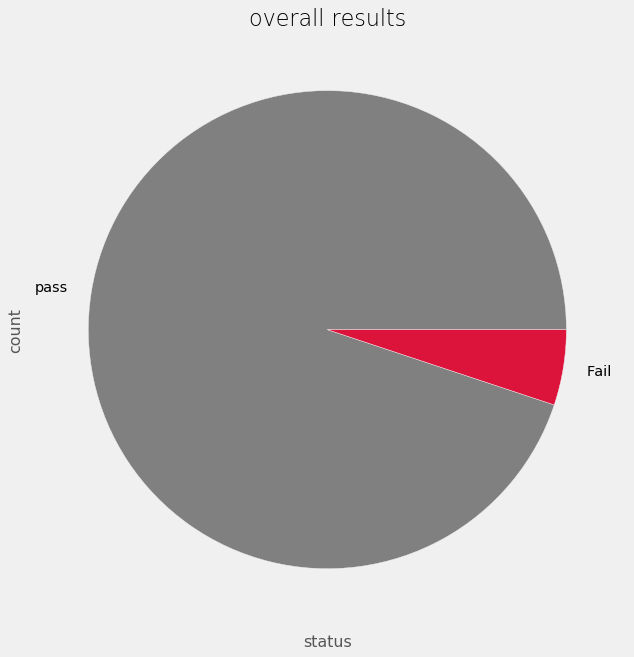

In [22]:
# checking which student is fail overall

data['status'] = data.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

data['status'].value_counts(dropna = False).plot.pie(colors = ['grey', 'crimson'])
plt.title('overall results', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [23]:
# Assigning grades to the grades according to the following criteria :
# 0  - 40 marks : grade E
# 41 - 60 marks : grade D
# 60 - 70 marks : grade C
# 70 - 80 marks : grade B
# 80 - 90 marks : grade A
# 90 - 100 marks : grade O

def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

data['grades'] = data.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

data['grades'].value_counts()

B    260
C    252
D    223
A    156
O     58
E     51
Name: grades, dtype: int64

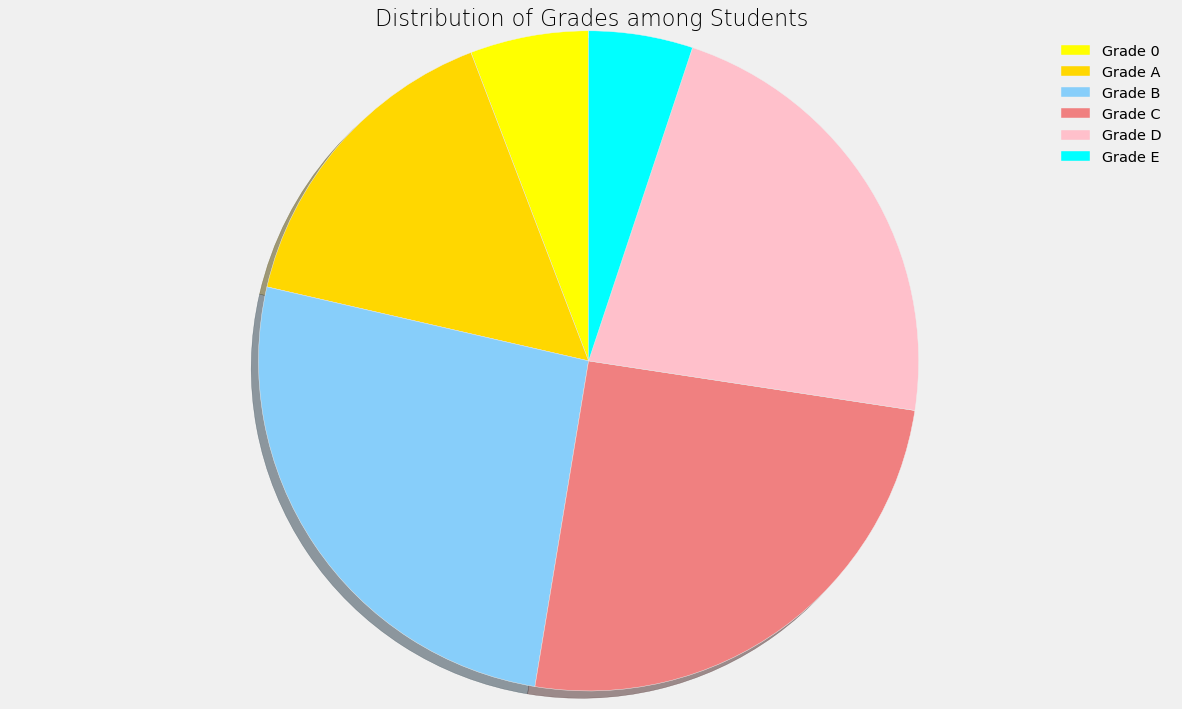

In [24]:
# plotting a pie chart for the distribution of various grades amongst the students

labels = ['Grade 0', 'Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E']
sizes = [58, 156, 260, 252, 223, 51]
colors = ['yellow', 'gold', 'lightskyblue', 'lightcoral', 'pink', 'cyan']
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels)
plt.title('Distribution of Grades among Students', fontweight = 30, fontsize = 20)
plt.axis('equal')
plt.tight_layout()
plt.show()

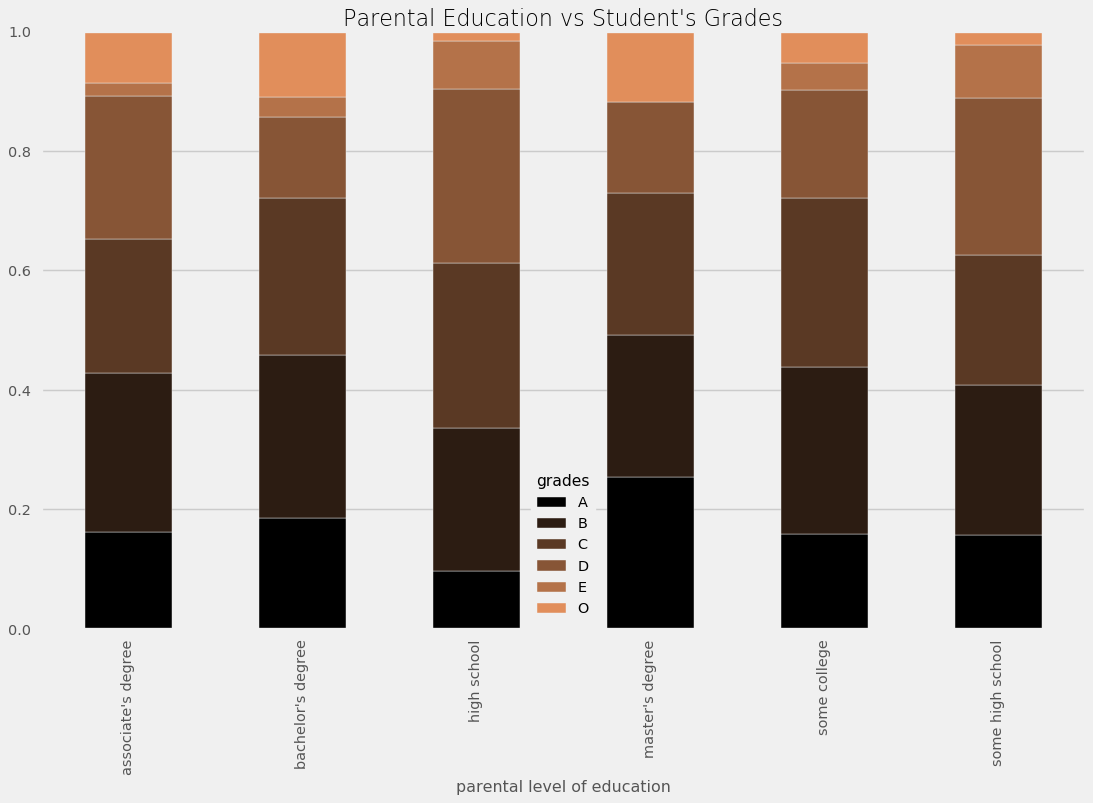

In [25]:
# comparison parent's degree and their corresponding grades

plt.rcParams['figure.figsize'] = (15, 9)

x = pd.crosstab(data['parental level of education'], data['grades'])
color = plt.cm.copper(np.linspace(0, 1, 8))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = color)
plt.title("Parental Education vs Student's Grades", fontweight = 30, fontsize = 20)
plt.show()

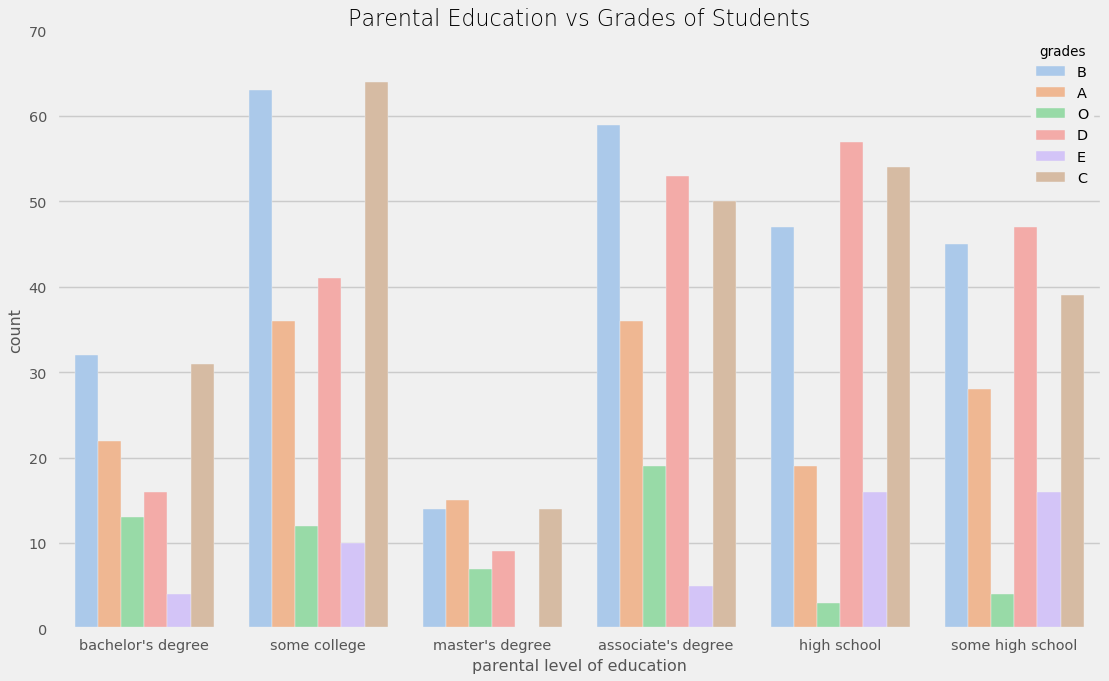

In [26]:
# for better visualization we will plot it again using seaborn

sns.countplot(x = data['parental level of education'], data = data, hue = data['grades'], palette = 'pastel')
plt.title('Parental Education vs Grades of Students', fontsize = 20, fontweight = 30)
plt.show()

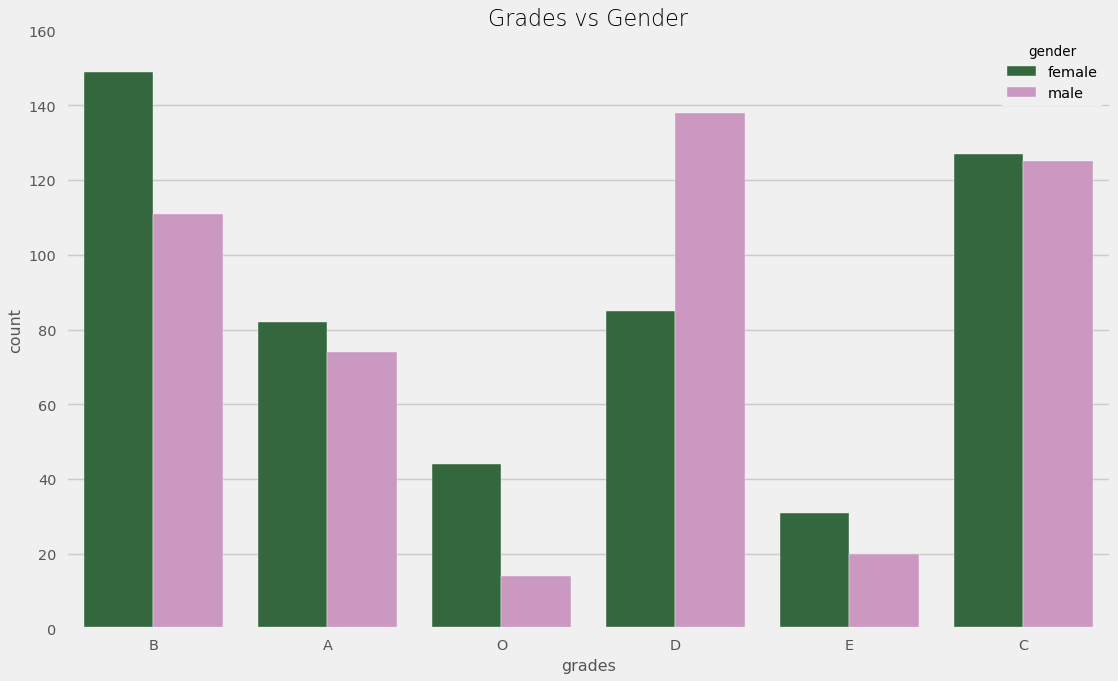

In [27]:
# comparing the distribution of grades among males and females

sns.countplot(x = data['grades'], data = data, hue = data['gender'], palette = 'cubehelix')
#sns.palplot(sns.dark_palette('purple'))
plt.title('Grades vs Gender', fontweight = 30, fontsize = 20)
plt.show()

## Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])

# label encoding for lunch
data['lunch'] = le.fit_transform(data['lunch'])

# label encoding for race/ethnicity
# we have to map values to each of the categories
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

# label encoding for parental level of education
data['parental level of education'] = le.fit_transform(data['parental level of education'])

#label encoding for gender
data['gender'] = le.fit_transform(data['gender'])

# label encoding for pass_math
data['pass_math'] = le.fit_transform(data['pass_math'])

# label encoding for pass_reading
data['pass_reading'] = le.fit_transform(data['pass_reading'])

# label encoding for pass_writing
data['pass_writing'] = le.fit_transform(data['pass_writing'])

# label encoding for status
data['status'] = le.fit_transform(data['status'])


## Data Preparation

In [29]:
# splitting the dependent and independent variables

x = data.iloc[:,:14]
y = data.iloc[:,14]

print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


In [30]:
# splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 14)
(750,)
(250, 14)
(250,)


In [31]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)


In [32]:
# applying principal components analysis

from sklearn.decomposition import PCA

# creating a principal component analysis model
#pca = PCA(n_components = None)

# feeding the independent variables to the PCA model
#x_train = pca.fit_transform(x_train)
#x_test = pca.transform(x_test)

# visualising the principal components that will explain the highest share of variance
#explained_variance = pca.explained_variance_ratio_
#print(explained_variance)

# creating a principal component analysis model
#pca = PCA(n_components = 2)

# feeding the independent variables to the PCA model
#x_train = pca.fit_transform(x_train)
#x_test = pca.transform(x_test)

## Modelling

## Logistic Regression

In [33]:
from sklearn.linear_model import  LogisticRegression

# creating a model
model = LogisticRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))


Training Accuracy : 0.7786666666666666
Testing Accuracy : 0.768


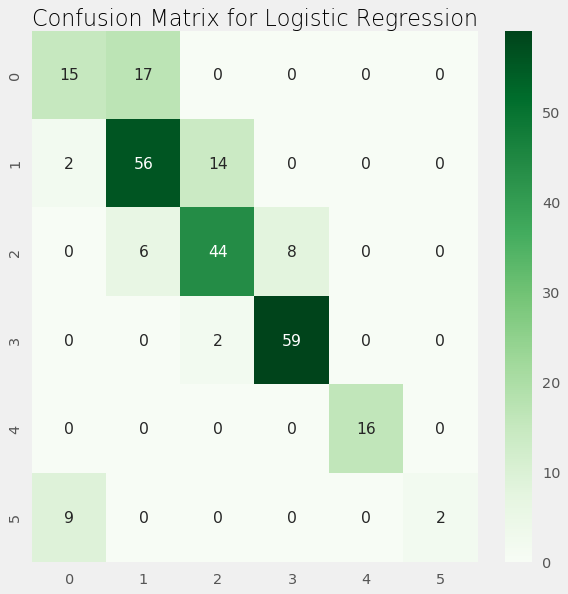

In [34]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Greens')
plt.title('Confusion Matrix for Logistic Regression', fontweight = 30, fontsize = 20)
plt.show()

**Random Forest**

In [35]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9986666666666667
Testing Accuracy : 1.0


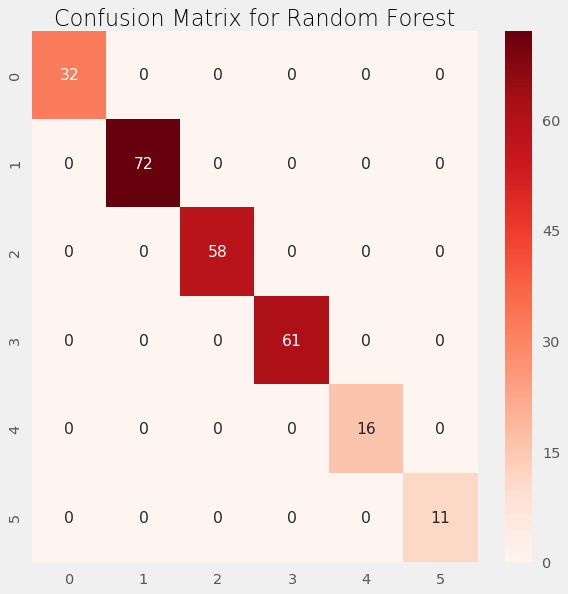

In [36]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)
plt.show()